In [1]:
import os
import itertools
import numpy as np
import operator
import math
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)

In [3]:
doctopic_triples = []
mallet_docnames = []

In [4]:
#here you can put the strings you want to get rid off when showing the titles
list_authors_to_replace=['Zola-Emile','Dumas-Alexandre-Pere','Dumas-Alexandre','Balzac-Honore-de','Verne-Jules','Sand-George','Flaubert-Gustave']
list_authors_to_find=['Zola-Emile','Balzac-Honore-de']

In [5]:
def replace_all(text, dic):
    for i in dic:
        text = text.replace(i, "")
    return text

In [6]:
with open("/home/odysseus/Bureau/ANR/code/topic_modelling_mallet/doc-topics-dumas.txt") as f:
    f.readline()  # read one line in order to skip the header
    for line in f:
        docnum, docname, *values = line.rstrip().split('\t')
        docname = os.path.basename(docname)
        if docname.split('_')[1] in list_authors_to_replace:
            #docname=replace_all(docname, list_authors_to_replace)
            mallet_docnames.append(docname[5:-4])
            print(docname[5:-4])
            for topic, share in grouper(2, values):
                triple = (docname[6:-4], int(topic), float(share))
                doctopic_triples.append(triple)

ola-Emile_Nana
erne-Jules_Le-Sphinx-des-Glaces
erne-Jules_Le-Phare-du-Bout-du-Monde
erne-Jules_L-invasion-de-la-mer
erne-Jules_Maitre-du-Monde
laubert-Gustave_La-tentation-de-saint-Antoine
umas-Alexandre_La-San-Felice
ola-Emile_Une-page-d-amour
umas-Alexandre_Vingt-ans-apres
umas-Alexandre_La-Tulipe-noire
umas-Alexandre-Pere_La-femme-au-collier-de-velours
umas-Alexandre-Pere_La-fille-du-marquis-II
laubert-Gustave_Les-Trois-Contes
and-George_Les-maitres-sonneurs
and-George_Laura
ola-Emile_La-fortune-des-Rougon
ola-Emile_La-faute-de-l-abbe-Mouret
erne-Jules_Nord-contre-Sud
erne-Jules_Le-Chateau-des-Carpathes
erne-Jules_Deux-ans-de-vacances
umas-Alexandre-Pere_Le-docteur-mysterieux-II
alzac-Honore-de_Une-tenebreuse-affaireFC
erne-Jules_Mathias-Sandorf
and-George_Nanon
laubert-Gustave_Madame-Bovary
erne-Jules_Michel-Strogoff
and-George_Elle-et-Lui
erne-Jules_Les-Indes-noires
umas-Alexandre_Les-Blancs-et-les-Bleus
and-George_Contes-d-une-grand-mere
alzac-Honore-de_Illusions-perdues
and-Geor

In [7]:
print(doctopic_triples)

[('ola-Emile_Nana', 10, 0.29480427312117136), ('ola-Emile_Nana', 16, 0.22745779172269534), ('ola-Emile_Nana', 9, 0.10763110712684895), ('ola-Emile_Nana', 14, 0.0868257881368594), ('ola-Emile_Nana', 19, 0.06534812490661886), ('ola-Emile_Nana', 18, 0.06448901837740924), ('ola-Emile_Nana', 17, 0.05795233826385776), ('ola-Emile_Nana', 7, 0.028555953981772), ('ola-Emile_Nana', 11, 0.01873225758254893), ('ola-Emile_Nana', 12, 0.01551994621246078), ('ola-Emile_Nana', 1, 0.0127558643358733), ('ola-Emile_Nana', 3, 0.005733602271029434), ('ola-Emile_Nana', 6, 0.004650380995069476), ('ola-Emile_Nana', 8, 0.0043889137905274165), ('ola-Emile_Nana', 0, 0.001512774540564769), ('ola-Emile_Nana', 2, 0.0012513073360227102), ('ola-Emile_Nana', 5, 0.0009524876736889288), ('ola-Emile_Nana', 13, 0.0008777827581054834), ('ola-Emile_Nana', 4, 0.0003922008068130883), ('ola-Emile_Nana', 15, 0.00016808606006275212), ('erne-Jules_Le-Sphinx-des-Glaces', 4, 0.7831782673571491), ('erne-Jules_Le-Sphinx-des-Glaces', 1

In [8]:
mallet_docnames = sorted(mallet_docnames)

In [9]:
num_docs = len(mallet_docnames)

In [10]:
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

In [11]:
num_topics = len(doctopic_triples) // len(mallet_docnames)
print(len(doctopic_triples))
print(num_topics)

1380
20


In [12]:
doctopic = np.zeros((num_docs, num_topics))

In [13]:
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

In [14]:
novel_names = []

In [15]:
for fn in mallet_docnames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    novel_names.append(name)
print(len(novel_names))

69


In [16]:
novel_names = np.asarray(novel_names)

In [17]:
doctopic

array([[  1.54940533e-02,   2.52797712e-02,   1.05008280e-02, ...,
          1.38003714e-04,   9.24750339e-02,   8.36177046e-02],
       [  3.41581877e-02,   1.19296628e-02,   8.41989577e-03, ...,
          1.43581381e-03,   1.05700713e-01,   9.59868118e-02],
       [  5.54840248e-02,   1.39961850e-02,   9.08440629e-03, ...,
          1.02527420e-03,   5.19551741e-02,   1.60061993e-01],
       ..., 
       [  3.47642339e-02,   2.36945982e-02,   2.82104089e-03, ...,
          5.89951517e-04,   1.33758098e-02,   8.11880551e-02],
       [  2.71178023e-02,   5.11814214e-01,   1.11084973e-03, ...,
          6.99181892e-03,   3.82524373e-02,   1.46932748e-01],
       [  3.22012839e-03,   5.87833920e-01,   2.64029820e-03, ...,
          1.48063781e-03,   2.51604887e-03,   1.42503624e-01]])

In [18]:
doctopic_orig = doctopic.copy()

In [19]:
num_groups = len(set(novel_names))
print(num_groups)

69


In [20]:
doctopic_grouped = np.zeros((num_groups, num_topics))

In [21]:
for i, name in enumerate(sorted(set(novel_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

In [22]:
doctopic = doctopic_grouped

In [23]:
doctopic

array([[  1.54940533e-02,   2.52797712e-02,   1.05008280e-02, ...,
          1.38003714e-04,   9.24750339e-02,   8.36177046e-02],
       [  3.41581877e-02,   1.19296628e-02,   8.41989577e-03, ...,
          1.43581381e-03,   1.05700713e-01,   9.59868118e-02],
       [  5.54840248e-02,   1.39961850e-02,   9.08440629e-03, ...,
          1.02527420e-03,   5.19551741e-02,   1.60061993e-01],
       ..., 
       [  3.47642339e-02,   2.36945982e-02,   2.82104089e-03, ...,
          5.89951517e-04,   1.33758098e-02,   8.11880551e-02],
       [  2.71178023e-02,   5.11814214e-01,   1.11084973e-03, ...,
          6.99181892e-03,   3.82524373e-02,   1.46932748e-01],
       [  3.22012839e-03,   5.87833920e-01,   2.64029820e-03, ...,
          1.48063781e-03,   2.51604887e-03,   1.42503624e-01]])

In [24]:
N, K = doctopic.shape
print(K)

20


In [25]:
ind = np.arange(N)

In [26]:
width = 0.5

In [27]:
plt.rcParams["figure.figsize"] = [16,9]

In [28]:
plt.bar(ind, doctopic[:,0], width=width)

<Container object of 69 artists>

In [29]:
plt.xticks(rotation=90)
plt.xticks(ind + width/2, novel_names)

([<matplotlib.axis.XTick at 0x7f95eca9cb00>,
 <a list of 69 Text xticklabel objects>)

In [30]:
plt.title('Share of Topic #0')

Text(0.5,1,'Share of Topic #0')

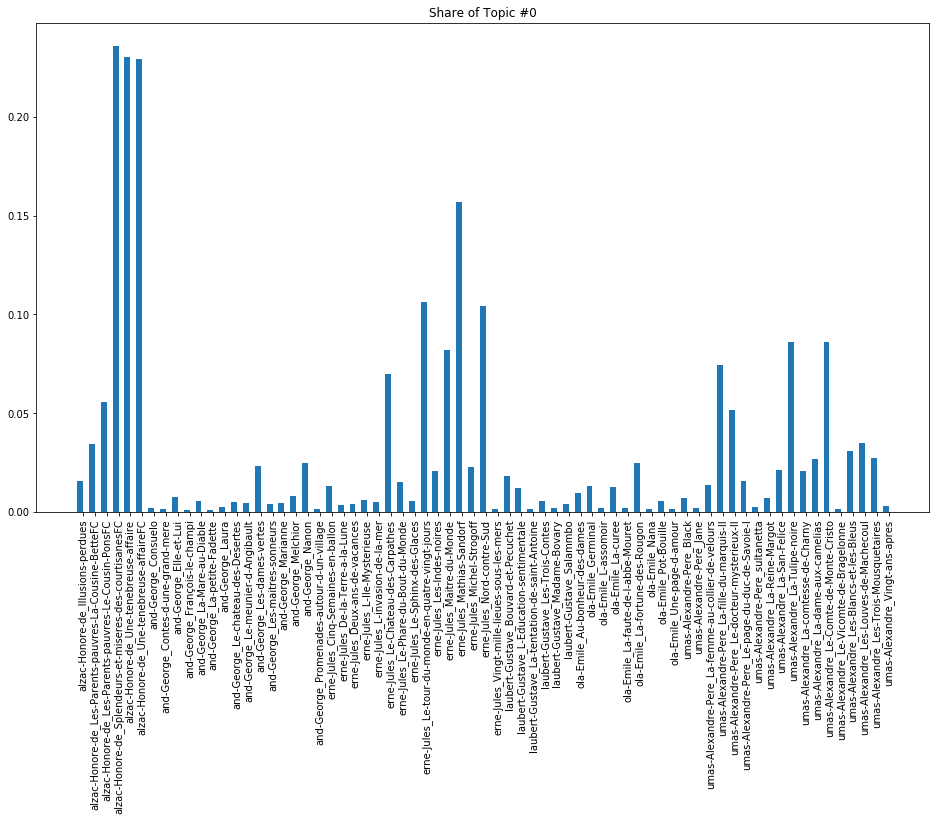

In [31]:
plt.show()

In [32]:
plots = []

In [33]:
height_cumulative = np.zeros(N)

In [34]:
for k in range(K):
    color = plt.cm.tab20(k/K, 1)
    if k == 0:
        p = plt.bar(ind, doctopic[:, k], width, color=color)
    else:
        p = plt.bar(ind, doctopic[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += doctopic[:, k]
    plots.append(p)

In [35]:
plt.ylim((0, 1))

(0, 1)

In [36]:
plt.ylabel('Topics')

Text(0,0.5,'Topics')

In [37]:
plt.title('Topics in novels')

Text(0.5,1,'Topics in novels')

In [38]:
list_topics =['crime/justice', 'noblesse/titre', 'animal', 'temps', 'marine', 'mort/finitude', 'argot/camaraderie', 'famille', 'armée', 'seigneurie','affaires/mondanités','sentiment','nature','spiritualité','objet commun','modernité/technique','corps','?','plaisir/bonheur','?']

In [39]:
plt.xticks(rotation=90)
plt.xticks(ind+width/2, novel_names)
index=1
for name in novel_names:
    print('numero '+str(index))
    print(name)
    index+=1

numero 1
alzac-Honore-de_Illusions-perdues
numero 2
alzac-Honore-de_Les-Parents-pauvres-La-Cousine-BetteFC
numero 3
alzac-Honore-de_Les-Parents-pauvres-Le-Cousin-PonsFC
numero 4
alzac-Honore-de_Splendeurs-et-miseres-des-courtisanesFC
numero 5
alzac-Honore-de_Une-tenebreuse-affaire
numero 6
alzac-Honore-de_Une-tenebreuse-affaireFC
numero 7
and-George_Consuelo
numero 8
and-George_Contes-d-une-grand-mere
numero 9
and-George_Elle-et-Lui
numero 10
and-George_François-le-champi
numero 11
and-George_La-Mare-au-Diable
numero 12
and-George_La-petite-Fadette
numero 13
and-George_Laura
numero 14
and-George_Le-chateau-des-Desertes
numero 15
and-George_Le-meunier-d-Angibault
numero 16
and-George_Les-dames-vertes
numero 17
and-George_Les-maitres-sonneurs
numero 18
and-George_Marianne
numero 19
and-George_Melchior
numero 20
and-George_Nanon
numero 21
and-George_Promenades-autour-d-un-village
numero 22
erne-Jules_Cinq-Semaines-en-ballon
numero 23
erne-Jules_De-la-Terre-a-la-Lune
numero 24
erne-Jules_D

In [40]:
plt.yticks(np.arange(0, 1, 10))

([<matplotlib.axis.YTick at 0x7f95ec98d588>],
 <a list of 1 Text yticklabel objects>)

In [41]:
#Pour cette expérience, topic 0 : aventure ; topic 1 : argent ; topic 2 : mort
topic_labels = [k for k in list_topics]

In [42]:
plt.legend([p[0] for p in plots], topic_labels)

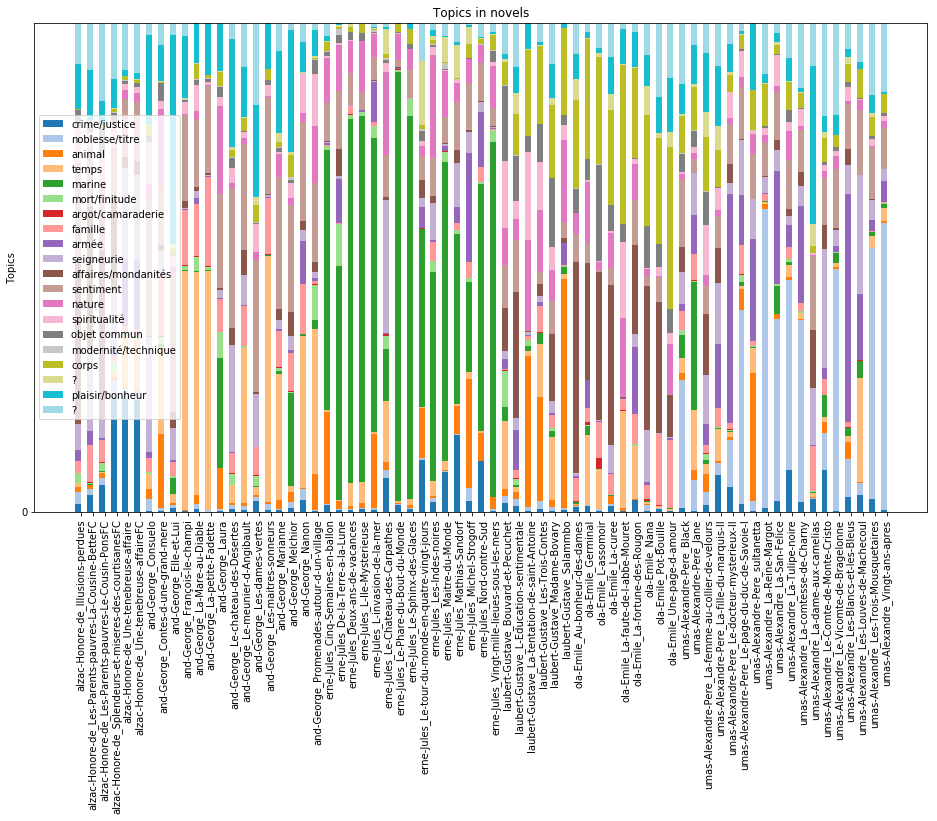

In [43]:
plt.show()